**Import Library yang Dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Membaca File Akhir Hasil EDA dan Data Pre-processing**

In [2]:
df = pd.read_csv('/content/df_new2_output.csv')

In [3]:
df

,Date,Qty,Amount,B2B,Qty_log,Amount_log,Size_encoded,Category_Bottom,Category_Ethnic Dress,Category_Saree,...,Category_kurta,Region_North,Region_Others,Region_South,Region_West,Status_encoded,Month_Encoded,Month_Name,Day_Type,Is_Weekend
0,2022-04-30,1,406.0,0,0.693147,6.008813,6,0,0,0,...,1,0,0,1,0,3,4,April,Weekend,1
1,2022-04-30,1,399.0,0,0.693147,5.991465,1,0,0,0,...,1,0,0,1,0,3,4,April,Weekend,1
2,2022-04-30,1,399.0,0,0.693147,5.991465,0,0,0,0,...,1,0,0,1,0,3,4,April,Weekend,1
3,2022-04-30,1,771.0,0,0.693147,6.648985,3,0,0,0,...,0,0,0,1,0,3,4,April,Weekend,1
4,2022-04-30,1,544.0,0,0.693147,6.300786,9,0,0,0,...,1,0,0,1,0,3,4,April,Weekend,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30707,2022-06-01,1,999.0,0,0.693147,6.907755,1,0,1,0,...,0,0,0,1,0,3,6,June,Weekday,0
30708,2022-06-01,1,1523.0,0,0.693147,7.329094,1,0,0,0,...,0,0,0,1,0,3,6,June,Weekday,0
30709,2022-06-01,1,854.0,0,0.693147,6.751101,1,0,0,0,...,0,0,0,1,0,3,6,June,Weekday,0
30710,2022-05-31,1,518.0,0,0.693147,6.251904,2,0,0,0,...,0,0,1,0,0,3,5,May,Weekday,0


In [ ]:
df.columns

Index(['Date', 'Qty', 'Amount', 'B2B', 'Qty_log', 'Amount_log', 'Size_encoded',
       'Category_Bottom', 'Category_Ethnic Dress', 'Category_Saree',
       'Category_Set', 'Category_Top', 'Category_Western Dress',
       'Category_kurta', 'Region_North', 'Region_Others', 'Region_South',
       'Region_West', 'Status_encoded', 'Month_Encoded', 'Month_Name',
       'Day_Type', 'Is_Weekend'],
      dtype='object')

**Menghapus kolom yang tidak diperlukan untuk pemodelan**

In [ ]:
df_cleaned = df.drop(columns=['Month_Name', 'Qty_log', 'Amount_log', 'Day_Type', 'Month_Encoded', 'Date'])

Kolom-kolom tersebut dihapus karena redundan dan tidak diperlukan di pemodelan sebagai contoh kolom day type dan month encoded sudah diwakilkan oleh kolom baru is_weekend. Kolom Date juga tidak perlu digunakan untuk pemodelan machine learning, namun dapat berguna untuk keperluan penggalian insight bisnis.

In [ ]:
df_cleaned.head(5)

,Qty,Amount,B2B,Size_encoded,Category_Bottom,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,Region_North,Region_Others,Region_South,Region_West,Status_encoded,Is_Weekend
0,1,406.0,0,6,0,0,0,0,0,0,1,0,0,1,0,3,1
1,1,399.0,0,1,0,0,0,0,0,0,1,0,0,1,0,3,1
2,1,399.0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,1
3,1,771.0,0,3,0,0,0,1,0,0,0,0,0,1,0,3,1
4,1,544.0,0,9,0,0,0,0,0,0,1,0,0,1,0,3,1


**Mengubah kode status dari 1-3 menjadi 0-1**

In [ ]:
df_cleaned['Status_encoded'] = df_cleaned['Status_encoded'].replace({1: 1, 2: 1, 3: 0})


Setelah melihat **distribusi pada fitur target yang sangat timpang** pada status untuk paket ditolak dan dikembalikan ke penjual dengan status paket diterima, maka diputuskan untuk menggabungkan status ditolak dan dikembalikan menjadi status 1, dan status dengan paket diterima menjadi status 0 adalah langkah yang masuk akal untuk menyederhanakan analisis dan pemodelan.

Dari sisi bisnis, ini mempermudah fokus pada dua hasil utama: **keberhasilan atau kegagalan pengiriman**, sehingga tim dapat lebih efektif mengidentifikasi masalah dan **meningkatkan kepuasan pelanggan.** Dari sisi teknis, penggabungan ini mengatasi ketidakseimbangan data, mengurangi noise, dan membantu algoritma machine learning bekerja lebih baik dengan klasifikasi biner yang lebih jelas, stabil, dan mudah diinterpretasikan.

Penentuan nilai 0 dan 1 didasari dengan tingkat kepentingan status yang ingin dijadikan fokus, dalam hal ini **1 biasanya digunakan untuk mewakili kondisi atau outcome yang ingin diprediksi atau dianggap lebih penting yaitu melihat status paket yang ditolak dan dikembalikan ke penjual.**

**Status 0** : Paket diterima oleh pembeli

**Status 1** : Paket ditolak atau dikembalikan ke penjual

In [ ]:
df_cleaned['Status_encoded'].value_counts()

,count
Status_encoded,
0,28754
1,1958


**Melakukan Modeling**

**1. Standardisasi pada kolom Qty dan Amount**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Identifikasi kolom numerik yang perlu distandardisasi
numerical_columns = ['Qty', 'Amount']

# Lakukan standardisasi pada kolom numerik
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

df_cleaned.sample(10)


,Qty,Amount,B2B,Size_encoded,Category_Bottom,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,Region_North,Region_Others,Region_South,Region_West,Status_encoded,Is_Weekend
6987,-0.055492,1.679501,0,2,0,0,0,1,0,0,0,0,0,0,0,1,1
17175,-0.055492,-2.282133,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0
4889,-0.055492,-0.220394,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0
4670,-0.055492,-1.124604,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0
7793,-0.055492,1.123606,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0
16760,-0.055492,-0.431494,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0
10496,-0.055492,-0.878321,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
26023,-0.055492,1.232674,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0
19090,-0.055492,3.192380,0,3,0,0,0,1,0,0,0,0,0,1,0,0,1
9322,-0.055492,0.388276,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0


Tujuan dari kode ini adalah untuk melakukan **standardisasi pada kolom-kolom numerik (Qty dan Amount)** dalam DataFrame df_cleaned. Standardisasi bertujuan untuk mengubah skala data numerik tersebut sehingga memiliki mean 0 dan variansi 1, yang sangat berguna untuk memastikan bahwa fitur-fitur tersebut memiliki **kontribusi yang setara ketika digunakan dalam pemodelan**. Dengan demikian, standardisasi membantu **meningkatkan kinerja dan stabilitas model prediksi.**

**2. Split Data Train dan Data Test**

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi fitur (X) dan target (y)
X = df_cleaned.drop(columns=['Status_encoded'])
y = df_cleaned['Status_encoded']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Data dibagi menjadi dua set, yaitu **training set** dan **testing set**, menggunakan fungsi train_test_split dari sklearn.model_selection. Parameter **test_size=0.2** berarti 20% data akan digunakan untuk testing dan sisanya untuk training, dengan **random_state=42** memastikan hasil yang konsisten setiap kali kode dijalankan. Penggunaan **stratify=y** memastikan bahwa distribusi kelas pada target (y) akan tetap proporsional antara training set dan testing set, yang sangat penting terutama saat menghadapi dataset yang tidak seimbang.

**Membuat Dasar Fungsi Evaluasi Klasifikasi**

1. **Meminimalkan kesalahan dalam memprediksi status paket ditolak (kelas 1) menjadi diterima (kelas 0) sangat penting** karena **risiko besar** bagi bisnis dan pelanggan jika terjadi kesalahan pada bagian ini.
2. Jika **salah memprediksi status diterima (kelas 0) menjadi ditolak (kelas 1), dampaknya lebih kecil**, karena kesalahan ini **lebih mudah diperbaiki** dan tidak berisiko besar terhadap kelangsungan operasi atau kepuasan pelanggan.
3. Oleh karena itu, **fokus pada recall dan ROC-AUC** adalah langkah yang tepat untuk meminimalkan kesalahan pada kelas 1, yang sangat penting untuk menghindari kesalahan yang lebih serius dalam bisnis.

Berdasarkan hal tersebut, maka metriks evaluasi yang tepat adalah **Recall.** Namun, untuk melihat lebih detil maka akan dicantumkan semua metriks evaluasinya.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, X_train, X_test, y_train, y_test, threshold=0.43):
    # Prediksi probabilitas untuk X_test dan X_train
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]

    # Terapkan threshold untuk prediksi
    y_pred = (y_pred_proba >= threshold).astype(int)
    y_pred_train = (y_pred_proba_train >= threshold).astype(int)

    # Metrik untuk data uji (test set)
    print("=== Test Set ===")
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("ROC-AUC (Test Set - Proba): %.2f" % roc_auc_score(y_test, y_pred_proba))

    # Metrik untuk data latih (train set)
    print("\n=== Train Set ===")
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("ROC-AUC (Train Set - Proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train))



Dengan menyesuaikan **threshold**, sensitivitas model terhadap kelas tertentu dapat dirubah. Tujuan dari pemodelan adalah meminimalisir kesalahan dalam memprediksi kelas 1 (yang jumlahnya sedikit), maka **menurunkan threshold** akan cenderung **meningkatkan recall**, karena lebih banyak sampel yang diprediksi sebagai kelas positif, mengurangi kemungkinan **kesalahan dalam mengklasifikasikan kelas 1 sebagai kelas 0.**

**Menggunakan SMOTE untuk menangani Class Imbalanced**

In [ ]:
# Inisiasi SMOTE dan fit pada data latih
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' artinya menyeimbangkan kelas minoritas dengan mayoritas
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan jumlah sampel setelah SMOTE
print(f"Jumlah sampel kelas 0 setelah SMOTE: {sum(y_train_resampled == 0)}")
print(f"Jumlah sampel kelas 1 setelah SMOTE: {sum(y_train_resampled == 1)}")

Jumlah sampel kelas 0 setelah SMOTE: 23003
Jumlah sampel kelas 1 setelah SMOTE: 23003


Fungsi SMOTE diinisiasi dengan parameter sampling_strategy='auto', yang berarti SMOTE akan **menyeimbangkan jumlah sampel kelas minoritas** (kelas dengan jumlah sedikit) agar jumlahnya setara dengan kelas mayoritas, yaitu **kelas 1 yang lebih sedikit akan diperbanyak hingga jumlahnya sama dengan kelas 0.**

**1. Logistic Regression**

Logistic Regression digunakan sebagai **baseline** karena cepat dilatih, mudah diinterpretasi, dan lebih stabil dalam menangani data yang imbalanced. Logistic Regression juga memungkinkan penyesuaian seperti **class_weight='balanced'** untuk mengatasi ketidakseimbangan kelas.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression dengan class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced')

# Melatih model
logreg.fit(X_train_resampled, y_train_resampled)

# Evaluasi model menggunakan fungsi eval_classification
eval_classification(logreg, X_train_resampled, X_test, y_train_resampled, y_test)


=== Test Set ===
Accuracy (Test Set): 0.36
Precision (Test Set): 0.07
Recall (Test Set): 0.72
F1-Score (Test Set): 0.13
ROC-AUC (Test Set - Proba): 0.55

=== Train Set ===
Accuracy (Train Set): 0.57
Precision (Train Set): 0.55
Recall (Train Set): 0.81
F1-Score (Train Set): 0.65
ROC-AUC (Train Set - Proba): 0.63


**class_weight='balanced'** : Memberikan bobot pada setiap kelas yang berbanding terbalik dengan frekuensinya dalam data. Hal ini membantu **mengatasi ketidakseimbangan kelas** dengan menyesuaikan pengaruh kelas minoritas.

Recall adalah metrik utama yang harus diprioritaskan dalam situasi ini, dan meskipun precision rendah, hasil yang diperoleh (recall 72% pada test set) menunjukkan bahwa model memenuhi tujuan bisnis dengan baik namun masih bisa dioptimalkan. Accuracy dan ROC-AUC yang rendah dapat dimaklumi karena fokus utama adalah mendeteksi status "ditolak" (kelas 1).

**Hyperparameter Tuning Logistic Regression**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter grid
penalty = ['l2']
C = [float(x) for x in np.linspace(0.004, 0.0045, 100)]
hyperparameters = dict(penalty=penalty, C=C)

# Inisialisasi model Logistic Regression dengan class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced')

# RandomizedSearchCV untuk mencari hyperparameter terbaik
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=1, cv=5, n_iter=50)
rs.fit(X_train_resampled, y_train_resampled)

# Evaluasi menggunakan model terbaik yang ditemukan
best_model = rs.best_estimator_  # Model terbaik hasil RandomizedSearchCV
eval_classification(best_model, X_train_resampled, X_test, y_train_resampled, y_test)

=== Test Set ===
Accuracy (Test Set): 0.27
Precision (Test Set): 0.07
Recall (Test Set): 0.82
F1-Score (Test Set): 0.12
ROC-AUC (Test Set - Proba): 0.56

=== Train Set ===
Accuracy (Train Set): 0.55
Precision (Train Set): 0.53
Recall (Train Set): 0.87
F1-Score (Train Set): 0.66
ROC-AUC (Train Set - Proba): 0.62


* Recall yang lebih tinggi (82% pada test set) menunjukkan bahwa model sangat baik dalam mendeteksi status "ditolak" (kelas 1)
* Precision yang rendah dan accuracy yang juga rendah pada test set mencerminkan adanya false positives yang cukup banyak (status diterima yang salah diprediksi menjadi ditolak), yang mungkin memerlukan penanganan manual setelah prediksi.

**Learning Curve Logistic Regression**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param value: 0.005; train: 0.5706045810338803; test: 0.5696258680832792
param value: 0.005050505050505051; train: 0.5706629331317715; test: 0.5696307474476487
param value: 0.005101010101010101; train: 0.570713456832134; test: 0.5695309422673608
param value: 0.005151515151515152; train: 0.5707800259714028; test: 0.5694351292942842
param value: 0.0052020202020202026; train: 0.5707920461704451; test: 0.5695996969471148
param value: 0.0052525252525252525; train: 0.5708463452681973; test: 0.5695788487538991
param value: 0.005303030303030303; train: 0.5708991730713785; test: 0.5696134478830656
param value: 0.005353535353535353; train: 0.5709818154098285; test: 0.5696010276828519
param value: 0.005404040404040404; train: 0.5710436375420853; test: 0.56957840517532
param value: 0.005454545454545455; train: 0.5711228931269945; test: 0.569594374004166
param value: 0.005505050505050505; train: 0.5711184237227317; test: 0.5697021635988773
param value: 0.005555555555555556; train: 0.5711823278756077

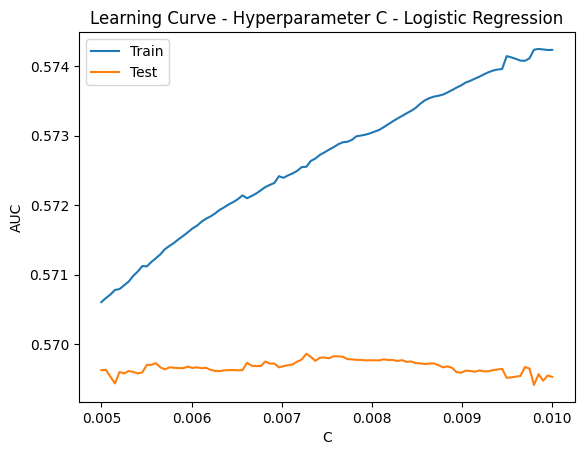

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.005, 0.01, 100)]
draw_learning_curve(param_values)

Berdasarkan learning Curve diatas, terlihat bahwa nilai AUC pada data train akan semakin membesar sedangkan pada data test cenderung tetap seiring membesarnya nilai parameter C. Hal ini dapat menyebabkan overfitting. Dapat disimpulkan **nilai parameter C yang semakin kecil lebih baik.**

**2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)
eval_classification(rf, X_train_resampled, X_test, y_train_resampled, y_test, threshold=0.4)

=== Test Set ===
Accuracy (Test Set): 0.76
Precision (Test Set): 0.06
Recall (Test Set): 0.20
F1-Score (Test Set): 0.10
ROC-AUC (Test Set - Proba): 0.50

=== Train Set ===
Accuracy (Train Set): 0.94
Precision (Train Set): 0.92
Recall (Train Set): 0.96
F1-Score (Train Set): 0.94
ROC-AUC (Train Set - Proba): 0.99


* Recall yang rendah menunjukkan bahwa model hanya berhasil mengenali sekitar 20% dari semua kasus sebenarnya yang seharusnya kelas 1 (ditolak). Ini berarti banyak data kelas 1 yang terlewat.
* Terlihat ada overfitting yang jelas, dimana model terlalu "memahami" data latih dengan sangat baik (accuracy dan recall sangat tinggi di train set), tetapi gagal untuk generalisasi dengan baik di test set (accuracy, precision, recall, F1-score, dan ROC-AUC sangat rendah).

**Tuning Hyperparameter Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definisikan grid hyperparameter
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Inisialisasi model RandomForest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Mencari hyperparameters terbaik menggunakan RandomizedSearchCV
rs = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train_resampled, y_train_resampled)

# Evaluasi model terbaik dari RandomizedSearchCV
eval_classification(rs.best_estimator_, X_train_resampled, X_test, y_train_resampled, y_test, threshold=0.35)

=== Test Set ===
Accuracy (Test Set): 0.57
Precision (Test Set): 0.07
Recall (Test Set): 0.47
F1-Score (Test Set): 0.12
ROC-AUC (Test Set - Proba): 0.52

=== Train Set ===
Accuracy (Train Set): 0.79
Precision (Train Set): 0.72
Recall (Train Set): 0.96
F1-Score (Train Set): 0.82
ROC-AUC (Train Set - Proba): 0.92


* Setelah dilakukan tuning, hasil model menunjukkan peningkatan yang signifikan pada data latih, namun masih ada perbedaan mencolok antara kinerja di train set dan test set, yang mengindikasikan adanya overfitting.
* Di test set recall (0.47) masih sangat rendah, yang menunjukkan bahwa model masih kesulitan memprediksi kelas positif dengan benar (kelas 1/ditolak). Meskipun recall lebih baik di test set dibandingkan sebelumnya, nilai precision yang rendah menandakan bahwa banyak prediksi positif yang salah.

**3. XGBoost**

In [ ]:
from xgboost import XGBClassifier

# Menghitung scale_pos_weight
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

xg = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state = 42)
xg.fit(X_train_resampled, y_train_resampled)
eval_classification(xg, X_train_resampled, X_test, y_train_resampled, y_test)

=== Test Set ===
Accuracy (Test Set): 0.19
Precision (Test Set): 0.06
Recall (Test Set): 0.87
F1-Score (Test Set): 0.12
ROC-AUC (Test Set - Proba): 0.53

=== Train Set ===
Accuracy (Train Set): 0.57
Precision (Train Set): 0.54
Recall (Train Set): 1.00
F1-Score (Train Set): 0.70
ROC-AUC (Train Set - Proba): 0.87


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Prediksi probabilitas
probabilities_rf = rf_model.predict_proba(X_test)

NameError: name 'X_train' is not defined

Model XGBoost sebelum tuning cenderung menghafal data latih (overfitting) dengan recall yang sempurna (1.00) pada train set. Walaupun nilai recall cukup tinggi, namun terlihat bahwa nilai precision dan accuracy yang tetap sangat rendah. Nilai recall 0,87 menunjukkan model sangat baik dalam memprediksi kelas positif (ditolak) meskipun banyak kesalahan dalam prediksi kelas negatif (diterima).

**Tuning Hyperparameter XGBoost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train_resampled, y_train_resampled)

# Predict & Evaluation
eval_classification(xg_tuned, X_train_resampled, X_test, y_train_resampled, y_test, threshold=0.5)

=== Test Set ===
Accuracy (Test Set): 0.07
Precision (Test Set): 0.06
Recall (Test Set): 1.00
F1-Score (Test Set): 0.12
ROC-AUC (Test Set - Proba): 0.55

=== Train Set ===
Accuracy (Train Set): 0.50
Precision (Train Set): 0.50
Recall (Train Set): 1.00
F1-Score (Train Set): 0.67
ROC-AUC (Train Set - Proba): 0.75


Model mengalami recall yang sempurna pada kedua data latih dan uji (1.00), tetapi dengan precision yang sangat rendah dan accuracy yang sangat buruk pada test set. Ini menunjukkan bahwa model terlalu memprediksi kelas positif (ditolak) dan mengabaikan kelas negatif (diterima), yang menyebabkan banyak kesalahan prediksi pada test set. Meskipun model berhasil memprediksi semua kasus kelas positif, hasil keseluruhan tidak baik karena model tidak dapat mengklasifikasikan kelas negatif dengan benar.

**Model yang Paling Optimal:**

**XGBoost (Sebelum Tuning)** adalah model yang paling optimal untuk kasus ini meskipun precision-nya rendah, karena recall-nya sangat tinggi (0.87), yang berarti model sangat baik dalam memprediksi status yang ditolak dan meminimalkan kesalahan dalam memprediksi kelas positif.

Meskipun precision perlu ditingkatkan, untuk tujuan ini, recall lebih penting karena menghindari kesalahan dalam memprediksi status yang seharusnya ditolak sebagai diterima (kelas 0).

**Feature Importance XGBoost**

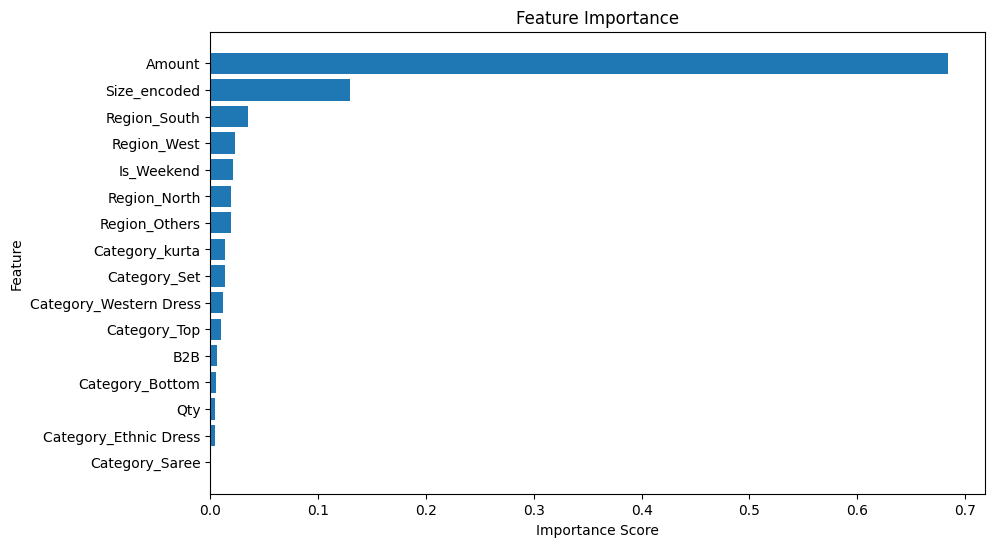

In [ ]:
# Model yang sudah dilatih
model = rs.best_estimator_  #Hasil dari RandomizedSearchCV

# Visualisasi feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Berdasarkan visualisasi, **fitur dengan importance tertinggi** adalah:

1. Amount - Kontribusi terbesar dalam memprediksi target model.
2. Size_encoded - Ukuran yang dienkode sebagai variabel numerik.
3. Region_South - Lokasi pembeli di wilayah Selatan.
4. Region_West - Lokasi pembeli di wilayah Barat.
5. Is_Weekend - Indikator pembelian yang terjadi pada akhir pekan.
6. Region_North - Lokasi pembeli di wilayah Utara.

**Business Insight**

1. Amount menunjukkan bahwa nilai total transaksi sangat berpengaruh, mengindikasikan bahwa pembelian dengan nilai tinggi memiliki korelasi kuat terhadap target prediksi.
2. Size_encoded merepresentasikan preferensi ukuran yang signifikan terhadap keputusan pembelian.
3. Region_South dan Region_West memiliki pengaruh besar, menunjukkan bahwa wilayah ini memiliki aktivitas penjualan yang lebih tinggi.
4. Is_Weekend mengindikasikan bahwa akhir pekan menjadi waktu penting untuk pembelian.
5. Region_North memiliki kontribusi moderat, menandakan potensi pertumbuhan yang belum optimal di wilayah ini.

**Rekomendasi Action Items**
1. Fokus pada transaksi besar (Amount):
* Berikan diskon atau insentif untuk transaksi dengan nilai tertentu untuk mendorong pembelian lebih besar.
* Promosikan program bundling produk yang dapat meningkatkan jumlah pembelian dalam satu transaksi.

2. Optimalkan strategi berdasarkan ukuran populer (Size_encoded):
* Pantau stok ukuran yang sering dibeli untuk menghindari kekurangan.
* Gunakan data ini untuk menginformasikan kampanye personalisasi, seperti rekomendasi produk berbasis ukuran pelanggan.

3. Prioritaskan wilayah Selatan dan Barat (Region_South & Region_West):

Tingkatkan distribusi dan layanan di wilayah ini untuk memperkuat pangsa pasar.
Lakukan promosi lokal seperti event spesial atau iklan berbasis lokasi.

4. Manfaatkan akhir pekan (Is_Weekend):

Jalankan kampanye promosi khusus akhir pekan seperti "Weekend Flash Sale."
Optimalkan strategi pemasaran digital pada hari Jumat dan Sabtu untuk memaksimalkan penjualan akhir pekan.

5. Eksplorasi potensi wilayah Utara (Region_North):

Analisis lebih dalam kendala wilayah ini (logistik, preferensi pelanggan, atau persaingan).
Jalankan strategi pemasaran khusus untuk menarik pelanggan di wilayah ini, seperti penawaran pengiriman gratis atau promosi eksklusif.
Rekomendasi ini dapat membantu meningkatkan penjualan dan efisiensi bisnis berdasarkan analisis feature importance.